## DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Speed Dating Data.csv', encoding='ISO-8859-1')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(8378, 195)

# DATA CLEANING

## Detection of null values

In [4]:
pd.options.display.max_rows = 200
df.isnull().sum().sort_values(ascending=True)

iid            0
dec_o          0
samerace       0
match          0
partner        0
order          0
position       0
dec            0
wave           0
condtn         0
idg            0
gender         0
round          0
id             1
pid           10
race          63
field         63
race_o        73
hiking        79
dining        79
exercise      79
goal          79
sports        79
go_out        79
museums       79
attr2_1       79
tvsports      79
art           79
tv            79
clubbing      79
reading       79
sinc2_1       79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
attr1_1       79
sinc1_1       79
gaming        79
from          79
imprace       79
intel1_1      79
intel2_1      79
fun2_1        79
imprelig      79
field_cd      82
pf_o_att      89
pf_o_sin      89
pf_o_int      89
shar2_1       89
fun1_1        89
amb2_1        89
career        89
age           95
date          97
pf_o_fun      98
amb1_1        

# Cleaning some missing fields with median value

In [5]:
df['race'].value_counts(dropna=False)

2.0    4727
4.0    1982
3.0     664
6.0     522
1.0     420
NaN      63
Name: race, dtype: int64

In [6]:
df['age'].value_counts(dropna=False)

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
NaN       95
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [7]:
df['field_cd'].value_counts(dropna=False)

8.0     1925
10.0     993
5.0      864
13.0     709
3.0      696
1.0      665
9.0      626
11.0     468
6.0      325
7.0      241
2.0      207
15.0     187
4.0      143
14.0     126
NaN       82
18.0      52
16.0      40
12.0      19
17.0      10
Name: field_cd, dtype: int64

In [8]:
df['match_es'].value_counts(dropna=False)

2.0     1695
3.0     1214
NaN     1173
1.0      968
4.0      875
5.0      736
0.0      616
6.0      323
8.0      173
7.0      153
10.0     147
9.0      115
2.5       53
1.5       40
12.0      33
0.5       22
3.4       22
18.0      20
Name: match_es, dtype: int64

In [9]:
for column in ['race', 'age', 'field_cd', 'match_es']:
    df[column] = df[column].fillna(df[column].median())

## Cleaning string fieds

In [10]:
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [11]:
df['income'] = df['income'].str.replace(',', '').astype(float)

# REMOVING FIELDS WITH MANY LABELS (CONTAINING MANY ERRORS AND SPECIFIC VALUES) AND INCOME WITH TOO MANY MISSING VALUES

In [12]:
df = df.drop(['income', 'field', 'from', 'career', 'zipcode', 'undergra', 'mn_sat', 'tuition'], axis=1)
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field_cd    float64
race        float64
imprace     float64
imprelig    float64
goal        float64
date        float64
go_out      float64
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64


# DATA ANALYSIS

## DISPLAY MATCHED

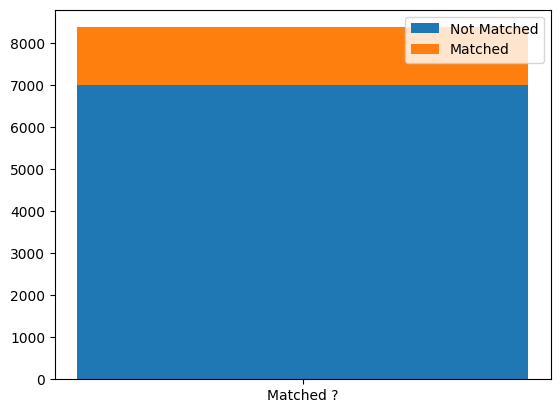

In [13]:
matched = df.groupby('match').size()
import matplotlib.pyplot as plt
plt.bar('Matched ?', matched[0])
plt.bar('Matched ?', matched[1], bottom=matched[0])
plt.legend(["Not Matched", "Matched"])
plt.show()

In [14]:
print('Percentage of matched :', round(matched[1]/matched.values.sum(), 2)*100, '%')

Percentage of matched : 16.0 %


## DISPLAY UNIQUE PERSONS

In [15]:
# How many unique persons are there ?
print("There are", df['iid'].nunique(), "unique persons.")

There are 551 unique persons.


## DISPLAY GENDERS

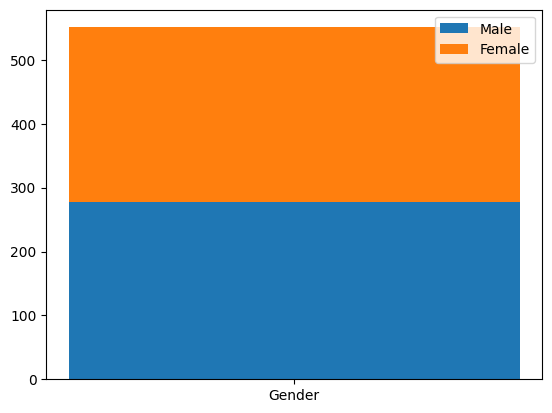

There are 277 males & 274 females.


In [16]:
# How many Males & Females
genders = df.groupby('iid').first()[['gender']]
gender_sizes = genders.groupby('gender').size()

import matplotlib.pyplot as plt
plt.bar('Gender', gender_sizes[1])
plt.bar('Gender', gender_sizes[0], bottom=gender_sizes[1])
plt.legend(["Male", "Female"])
plt.show()
print(f"There are {gender_sizes[1]} males & {gender_sizes[0]} females.")

## DISPLAY AGES PER GENDER

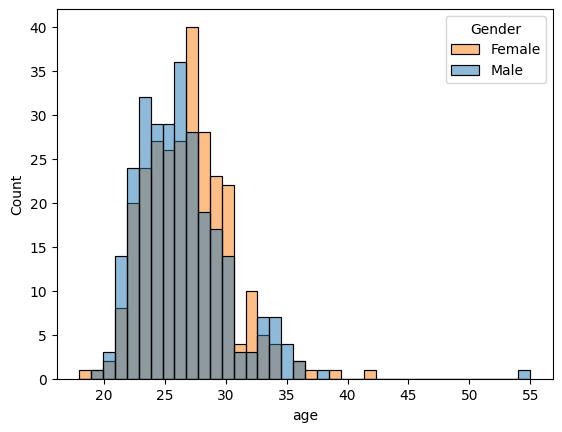

Females seem to be older than Males...


In [17]:
# Is there some age differences ?
ages_genders = df.groupby('iid').first()[['gender', 'age']]
g = sns.histplot(ages_genders, x='age', hue='gender')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show(g)
print('Females seem to be older than Males...')

In [18]:
# Average age per gender
print(ages_genders.groupby('gender')['age'].mean().round(2))
print("... but no on the mean !")

gender
0    26.12
1    26.58
Name: age, dtype: float64
... but no on the mean !


## DISPLAY RACES PER GENDER

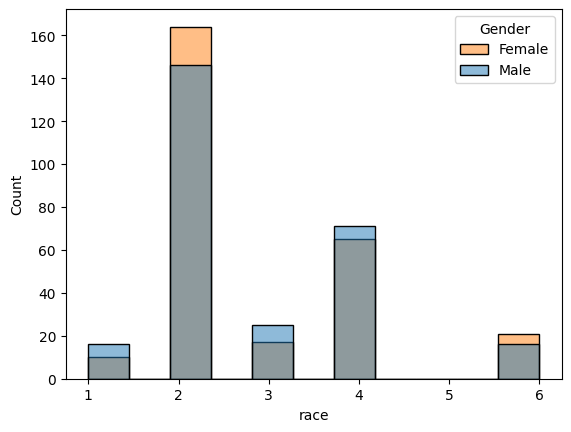

Main part of people are European/Caucasian-American.
Proportion of females & males in the same race is almost equal.


In [19]:
# Races
races_gender = df.groupby('iid').first()[['race', 'gender']]
g = sns.histplot(races_gender, x='race', hue='gender')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show(g)
print("Main part of people are European/Caucasian-American.")
print("Proportion of females & males in the same race is almost equal.")

 # DISPLAY FIELDS PER GENDER

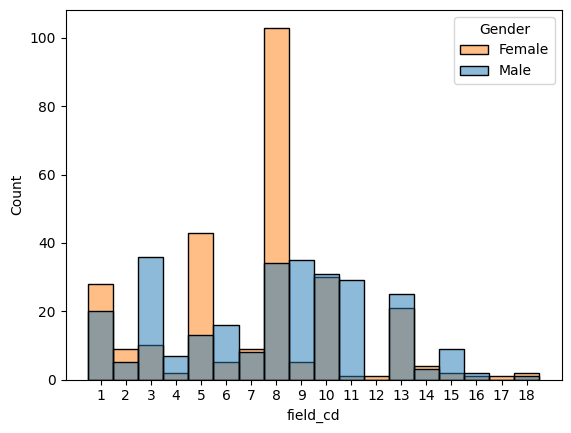

Females are mainly is Business/Econ/Finance(8) and Engineering(5).
Males fields are rather distributed.


In [20]:
# Field distribution
fields_gender = df.groupby('iid').first()[['field_cd', 'gender']]
g = sns.histplot(fields_gender, x='field_cd', hue='gender', discrete=True)
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.xticks(ticks=fields_gender['field_cd'].unique())
plt.show(g)
print("Females are mainly is Business/Econ/Finance(8) and Engineering(5).")
print("Males fields are rather distributed.")

# CORRELATIONS BETWEEN DATA

In [21]:
corr = df.corr().abs()

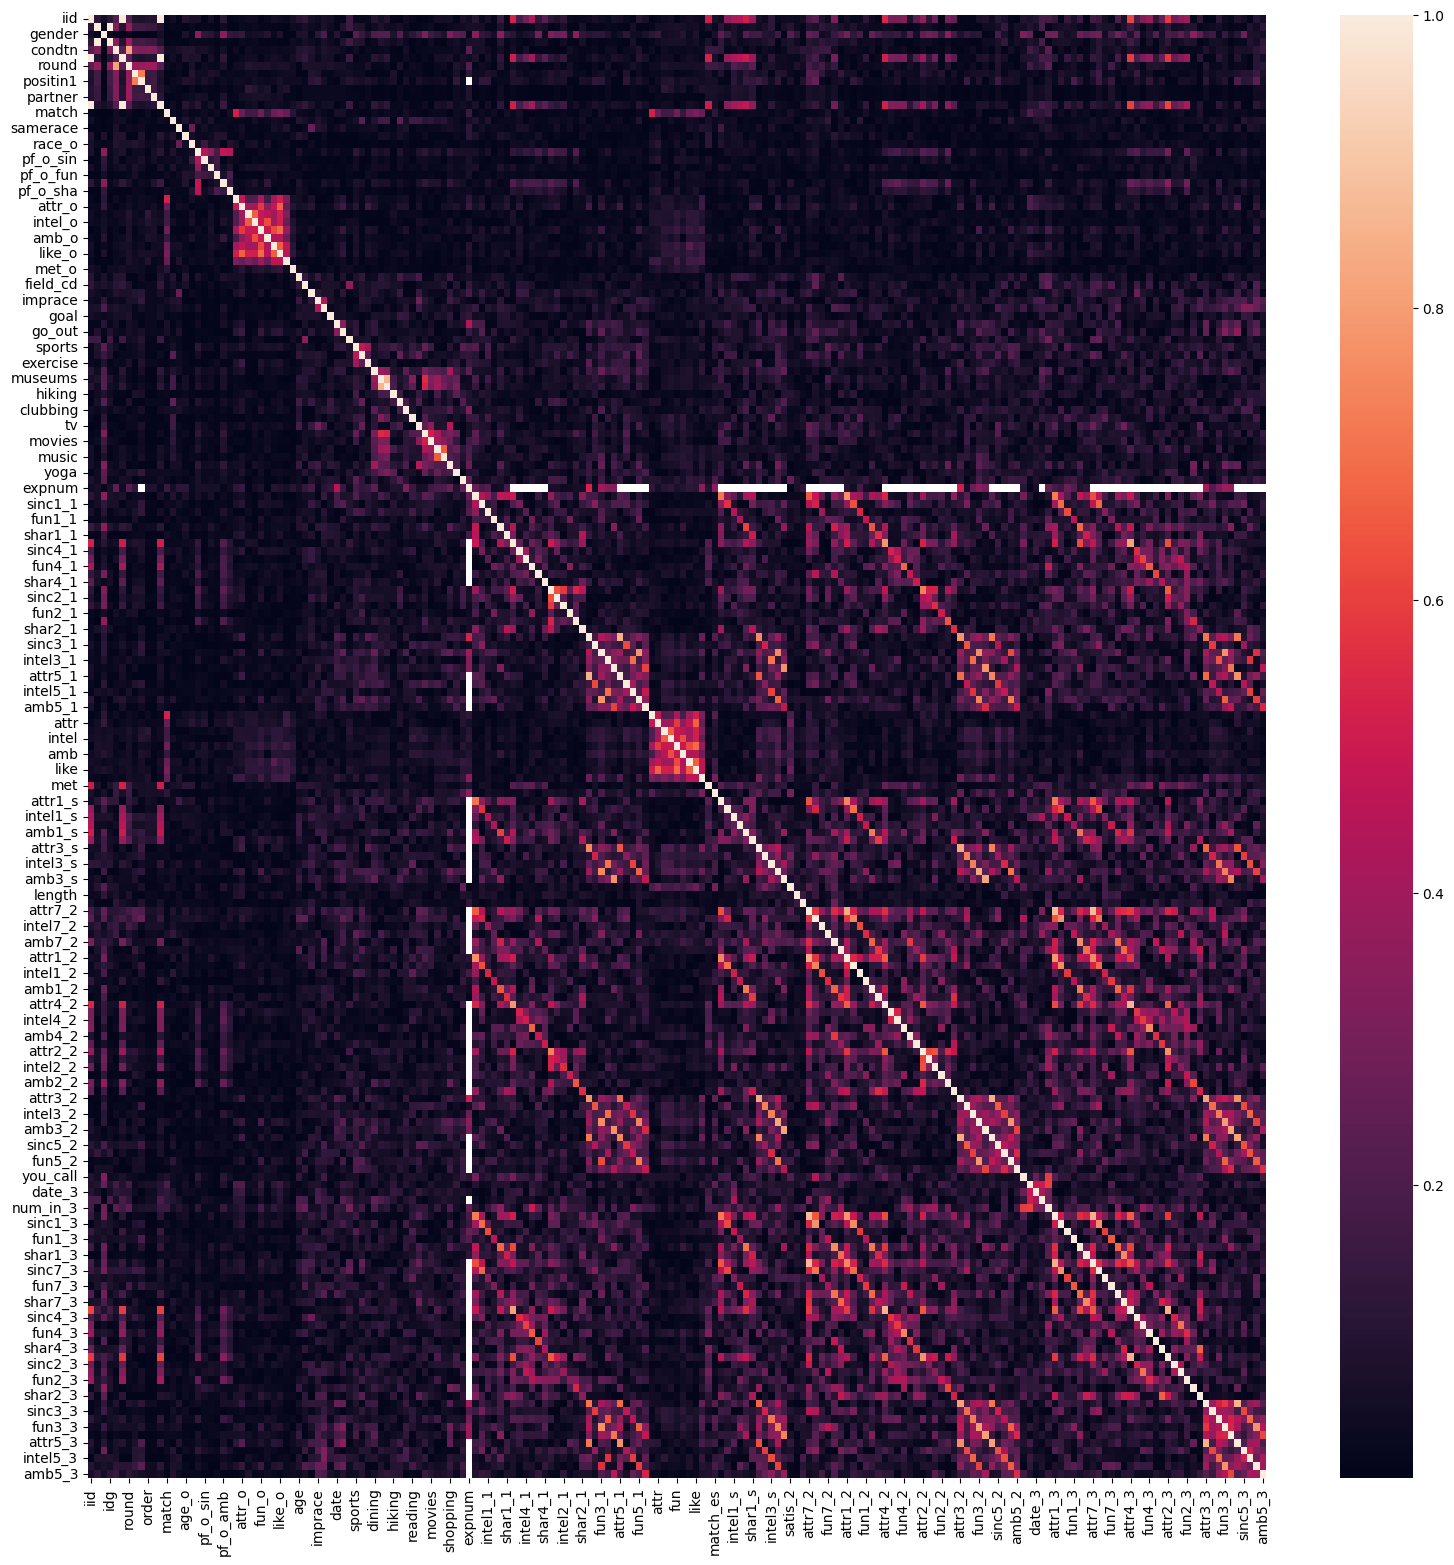

In [22]:
f, ax = plt.subplots(figsize=(19, 19))
sns.heatmap(corr, ax=ax);

## REMOVAL OF EXPNUM FIELD CORRELATED WITH MANY (REDUNDANT WITH EXPECTATIONS DETAILS)

In [23]:
df = df.drop('expnum', axis=1)

## REMOVAL OF EXPECTATIONS FIELD (WHAT DO YOU THINK THE OTHERS LOOK FOR/EXPECT/PERCEIVE ... ?)

In [24]:
col_suffixes = ['2_', '3_', '4_', '_5', ]
col_to_remove = []
for c in df.columns:
    for s in col_suffixes:
        if s in c:
            col_to_remove.append(c)
df = df.drop(col_to_remove, axis=1)

## REMOVAL OF ID + "USELESS" COLUMNS

In [25]:
df = df.drop(['iid', 'id', 'idg', 'wave', 'pid', 'round', 'condtn', 'position', 'positin1', 'order', 'partner'] , axis=1)

In [26]:
corr = df.corr().abs()

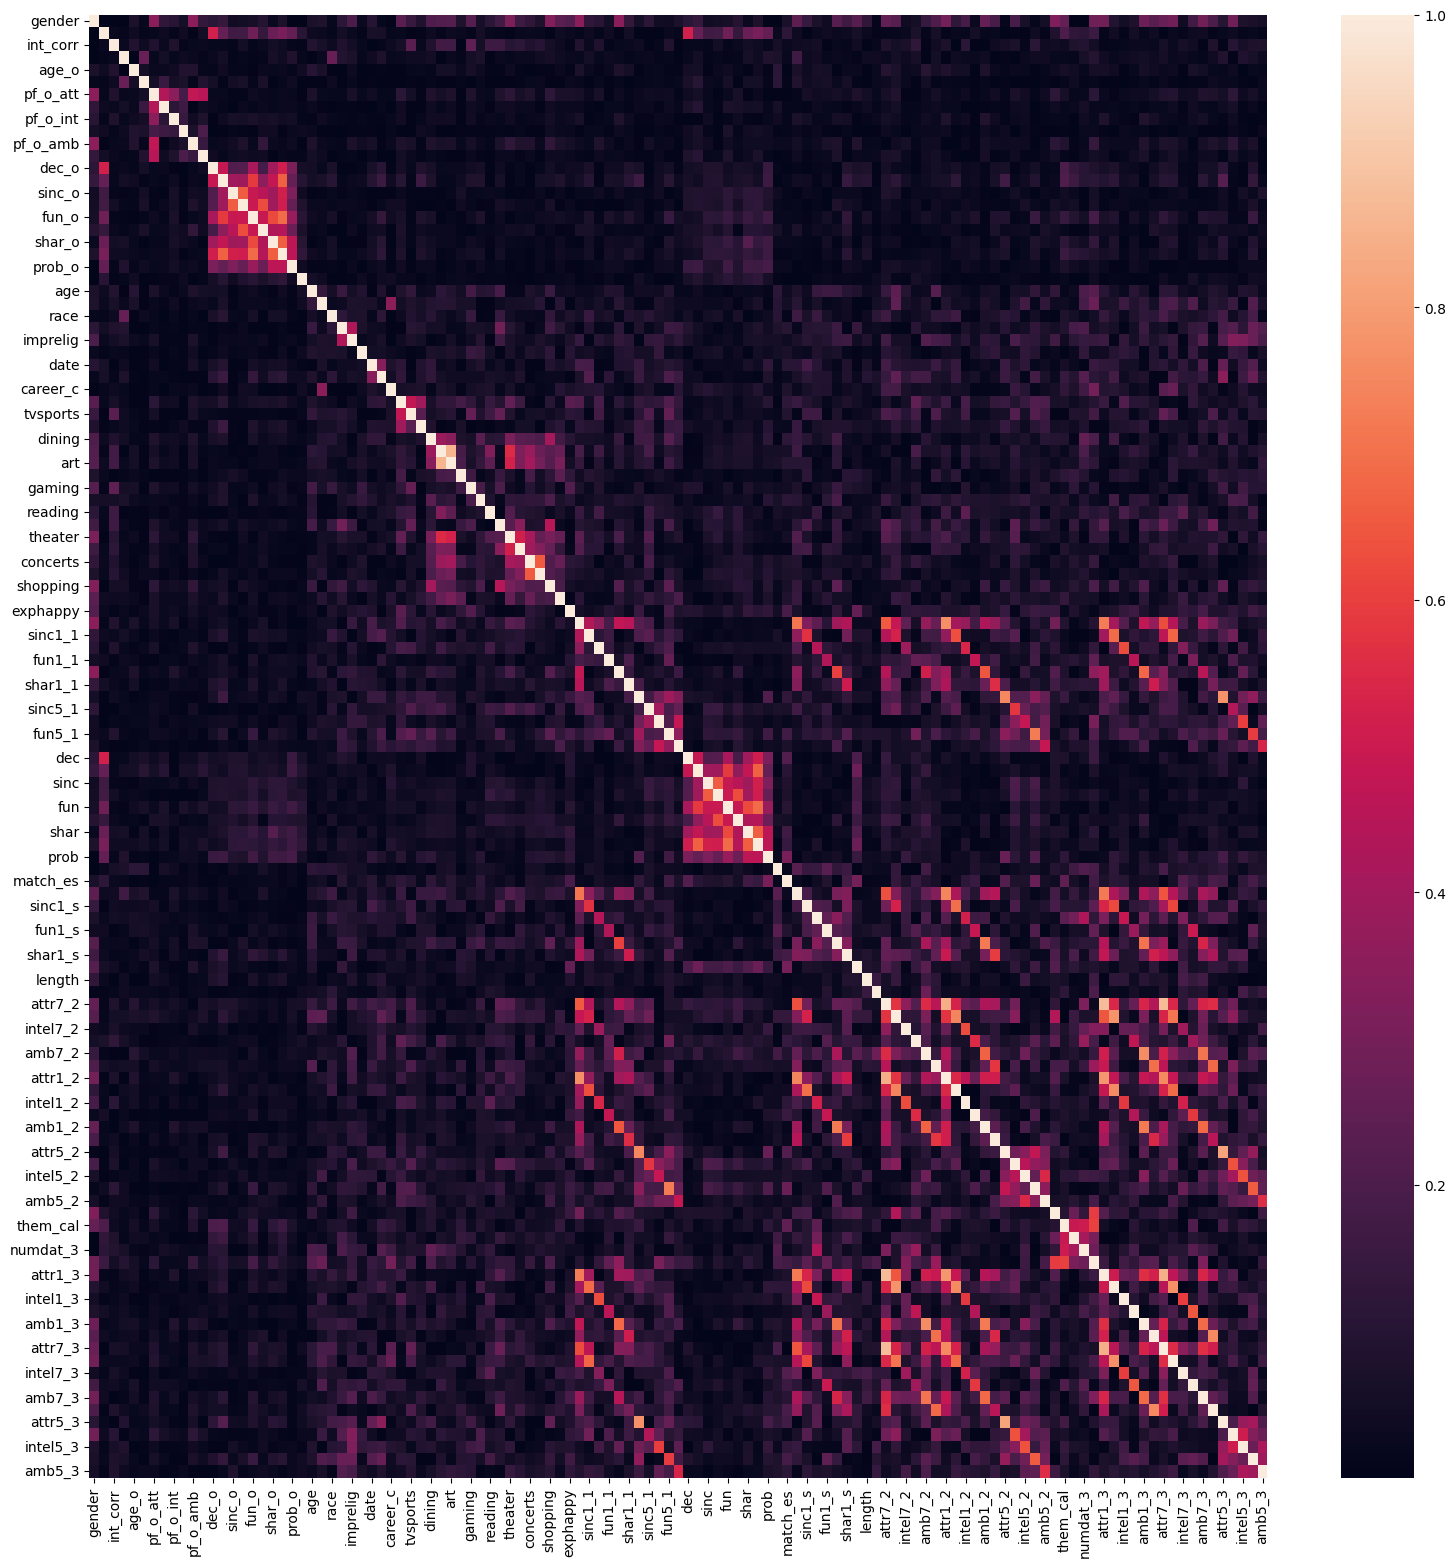

In [27]:
f, ax = plt.subplots(figsize=(19, 19))
sns.heatmap(corr, ax=ax);

# CORRELATION BETWEEN DECISION AND DECISION CRITERIAS

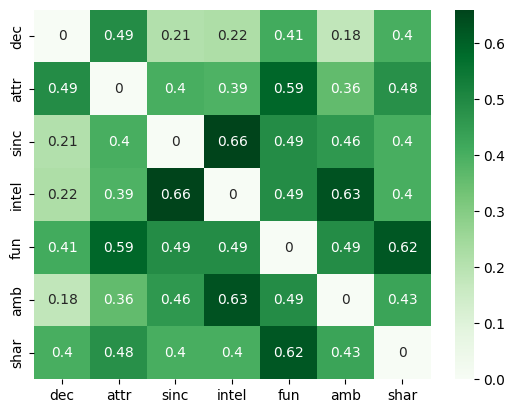

In [28]:
cols = ['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
df_whole_dec = df[cols].corr().abs().round(2)
np.fill_diagonal(df_whole_dec.values, 0)
sns.heatmap(df_whole_dec, cmap='Greens', annot=True);

In [29]:
df_whole_dec['dec'].sort_values(ascending=False)[:4]

attr     0.49
fun      0.41
shar     0.40
intel    0.22
Name: dec, dtype: float64

## Correlation between decision and criteriais for women

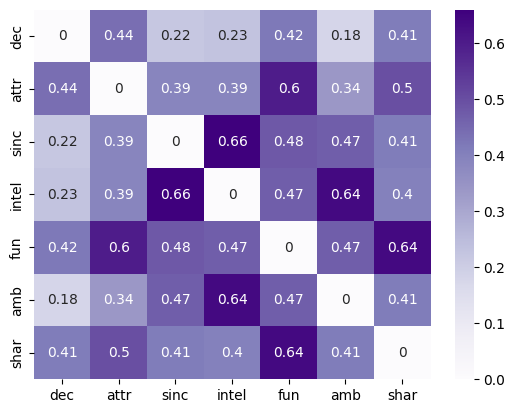

In [30]:
df_female = df[df.gender==0]
df_dec_female = df_female[cols].corr().abs().round(2)
np.fill_diagonal(df_dec_female.values, 0)
sns.heatmap(df_dec_female, cmap='Purples', annot=True);

In [31]:
df_dec_female['dec'].sort_values(ascending=False)[:4]

attr     0.44
fun      0.42
shar     0.41
intel    0.23
Name: dec, dtype: float64

## Correlation between decision and criterias for men

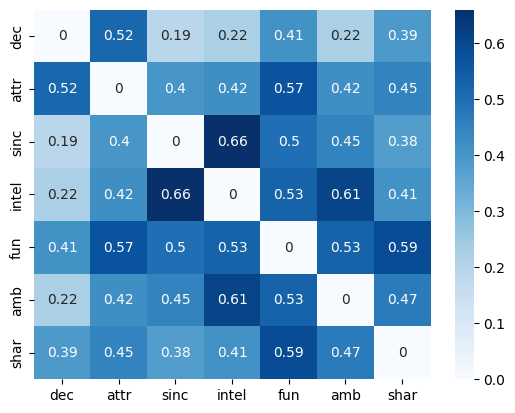

In [32]:
df_male = df[df.gender==1]
df_dec_male = df_male[cols].corr().abs().round(2)
np.fill_diagonal(df_dec_male.values, 0)
sns.heatmap(df_dec_male, cmap='Blues', annot=True);

In [33]:
df_dec_male['dec'].sort_values(ascending=False)[:4]

attr     0.52
fun      0.41
shar     0.39
intel    0.22
Name: dec, dtype: float64

# Men made their decision more based with attraction than women but not so much : 0.52 compared to 0.44 correlation with decision.
# For other criterias, it is almost the same ratio.